In [ ]:
import numpy as np

In [ ]:
## x and y denote the April tag positions
## x0 and y0 denote the positions of the obstacles

x = [0.0, 0.5, 1.0, 1.5, 2.0]
y = [-0.8, -0.3, 0.2, 0.5, 0.9]
xo = [0.8, 1.2]
yo = [-0.25, 0.1]

points = []
xx = []
yy = []
for xi in x:
  points.append([xi, -0.8])
  points.append([xi, 0.9])
for yi in y[1:4]:
  points.append([0.0, yi])
  points.append([2.0,yi])

for xi in xo:
  for yi in yo:
    points.append([xi,yi])
points = np.array(points)

from scipy.spatial import Voronoi, voronoi_plot_2d
vor = Voronoi(points)


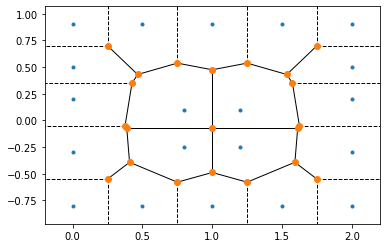

In [ ]:
##voronoi regions plotted

import matplotlib.pyplot as plt
fig = voronoi_plot_2d(vor)
plt.show()

In [ ]:
# print("vertices :: ",np.round(vertices, 2)[])

for i in range(len(vertices)):
  print(i,"  ::  ",np.round(vertices[i], 2))

print(graph)

0   ::   [ 0.38 -0.05]
1   ::   [0.43 0.35]
2   ::   [ 0.25 -0.55]
3   ::   [0.25 0.7 ]
4   ::   [0.75 0.54]
5   ::   [0.47 0.43]
6   ::   [ 1.25 -0.58]
7   ::   [ 1.75 -0.55]
8   ::   [ 1.59 -0.39]
9   ::   [1.75 0.7 ]
10   ::   [ 0.75 -0.58]
11   ::   [ 1.   -0.49]
12   ::   [ 0.39 -0.08]
13   ::   [ 0.41 -0.39]
14   ::   [1.58 0.35]
15   ::   [1.53 0.43]
16   ::   [ 1.62 -0.05]
17   ::   [ 1.61 -0.07]
18   ::   [1.25 0.54]
19   ::   [1.   0.48]
20   ::   [ 1.   -0.07]
{0: [], 1: [], 2: [], 3: [], 4: [], 5: [], 6: [], 7: [], 8: [], 9: [], 10: [], 11: [], 12: [], 13: [], 14: [], 15: [], 16: [], 17: [], 18: [], 19: [], 20: []}


In [ ]:
## We store the coordinates of the corners of the voronoi regions in hashset

vertices = vor.vertices
# print("vertices :: ",np.round(vertices, 2))
graph = {}
hashset = {}
for ind in range(len(vertices)):
  graph[ind] = []
  v = vertices[ind]
  if v[0] > 2.5 or v[0] < -0.5:
    continue
  if v[1] > 2.5 or v[1] < -1.0:
    continue
  hashset[ind] = [v[0],v[1]]
  # print(v)
  # print("hashset :: ",hashset)
  # print("-------------------")
  # print(hashset[ind])
# print("graph :: ",graph)  
print("hashset :: ",hashset)
Total_path = [1, 0, 12, 20, 11,20,17]

hashset ::  {0: [0.37500000000000006, -0.04999999999999999], 1: [0.4250000000000001, 0.35], 2: [0.25, -0.55], 3: [0.25, 0.7], 4: [0.75, 0.5374999999999999], 5: [0.4653846153846154, 0.43076923076923074], 6: [1.25, -0.5795454545454546], 7: [1.75, -0.55], 8: [1.5926470588235295, -0.39264705882352935], 9: [1.75, 0.7], 10: [0.75, -0.5795454545454546], 11: [1.0, -0.48863636363636365], 12: [0.3875, -0.07500000000000001], 13: [0.40735294117647064, -0.39264705882352935], 14: [1.575, 0.35], 15: [1.5346153846153845, 0.4307692307692308], 16: [1.625, -0.04999999999999996], 17: [1.6125, -0.07499999999999998], 18: [1.25, 0.5375000000000001], 19: [1.0, 0.4750000000000001], 20: [1.0, -0.07499999999999998]}


In [ ]:
## Create an adjacency list with the hashset coordinates nand store it in graph

ridges = vor.ridge_vertices
print(ridges)
for r in ridges:
  v1 = r[0]
  v2 = r[1]

  if v1 == -1 or v2 == -1:
    continue
  graph[v1].append(v2)
  graph[v2].append(v1)
print("graph :: ",graph) 

[[-1, 1], [-1, 0], [0, 1], [-1, 3], [1, 5], [3, 5], [-1, 2], [-1, 2], [-1, 7], [-1, 7], [-1, 6], [6, 8], [7, 8], [-1, 9], [-1, 9], [-1, 3], [-1, 4], [4, 5], [-1, 10], [2, 13], [10, 13], [6, 11], [10, 11], [0, 12], [12, 13], [14, 15], [14, 16], [15, 18], [16, 17], [17, 20], [19, 20], [18, 19], [-1, 14], [9, 15], [-1, 16], [-1, 18], [8, 17], [11, 20], [4, 19], [12, 20]]
graph ::  {0: [1, 12], 1: [0, 5], 2: [13], 3: [5], 4: [5, 19], 5: [1, 3, 4], 6: [8, 11], 7: [8], 8: [6, 7, 17], 9: [15], 10: [13, 11], 11: [6, 10, 20], 12: [0, 13, 20], 13: [2, 10, 12], 14: [15, 16], 15: [14, 18, 9], 16: [14, 17], 17: [16, 20, 8], 18: [15, 19], 19: [20, 18, 4], 20: [17, 19, 11, 12]}


In [ ]:
## We check if a point (and the edge attached to that point) passes through a polygon (obstacle in our case)

from shapely.geometry import Point
from shapely.geometry.polygon import Polygon

point = Point(1.0, -0.074)
polygon = Polygon([(0.8, -0.25), (0.8, 0.1), (1.2, 0.1), (1.2, -0.25)])
print(point.within(polygon))

True


In [ ]:
##Write a method to determine the shortest distance between two points

import queue
def bfs(start, dest):
  visited = []
  q = queue.Queue(maxsize=10000)
  q.put(start)
  parents = {}
  parents[start] = -1
  while not q.empty():
    current = q.get()
    curr_x = hashset[current][0]
    curr_y = hashset[current][1]
    visited.append(current)
    # print("current :: ",current)
    if current == dest:
      break
    neighbours = graph[current]
    for n in neighbours:
      # print(n)
      # print("coordinates :: ",hashset[n][0],":::",hashset[n][1])
      if n not in visited and polygon.contains(Point(hashset[n][0],hashset[n][1])) == False:
        q.put(n)
        parents[n] = current
        # print("parent added for :: ",n)
  return parents
   

In [ ]:
## Moving from point 0 to point 1

s = 1
e = 11
print(hashset)
parents = bfs(s,e)
# print("parents::",parents)

{0: [0.37500000000000006, -0.04999999999999999], 1: [0.4250000000000001, 0.35], 2: [0.25, -0.55], 3: [0.25, 0.7], 4: [0.75, 0.5374999999999999], 5: [0.4653846153846154, 0.43076923076923074], 6: [1.25, -0.5795454545454546], 7: [1.75, -0.55], 8: [1.5926470588235295, -0.39264705882352935], 9: [1.75, 0.7], 10: [0.75, -0.5795454545454546], 11: [1.0, -0.48863636363636365], 12: [0.3875, -0.07500000000000001], 13: [0.40735294117647064, -0.39264705882352935], 14: [1.575, 0.35], 15: [1.5346153846153845, 0.4307692307692308], 16: [1.625, -0.04999999999999996], 17: [1.6125, -0.07499999999999998], 18: [1.25, 0.5375000000000001], 19: [1.0, 0.4750000000000001], 20: [1.0, -0.07499999999999998]}


In [ ]:
print(parents)

{1: -1, 0: 1, 5: 1, 12: 0, 3: 5, 4: 5, 13: 12, 19: 4, 2: 13, 10: 13, 18: 19, 11: 10, 15: 18}


In [ ]:
def getPath(end):
  print(end)
  if parents[end] == -1:
    return
  path.append(parents[end])
  getPath(parents[end])

end = e
path = []
path = [end]
getPath(end)
path.reverse()
print("path :: ",path)

11
10
13
12
0
1
path ::  [1, 0, 12, 13, 10, 11]


In [ ]:
## Moving from point 1 to point 2

s = 11
e = 14
print(hashset)
parents = bfs(s,e)
# print("parents::",parents)

{0: [0.37500000000000006, -0.04999999999999999], 1: [0.4250000000000001, 0.35], 2: [0.25, -0.55], 3: [0.25, 0.7], 4: [0.75, 0.5374999999999999], 5: [0.4653846153846154, 0.43076923076923074], 6: [1.25, -0.5795454545454546], 7: [1.75, -0.55], 8: [1.5926470588235295, -0.39264705882352935], 9: [1.75, 0.7], 10: [0.75, -0.5795454545454546], 11: [1.0, -0.48863636363636365], 12: [0.3875, -0.07500000000000001], 13: [0.40735294117647064, -0.39264705882352935], 14: [1.575, 0.35], 15: [1.5346153846153845, 0.4307692307692308], 16: [1.625, -0.04999999999999996], 17: [1.6125, -0.07499999999999998], 18: [1.25, 0.5375000000000001], 19: [1.0, 0.4750000000000001], 20: [1.0, -0.07499999999999998]}


In [ ]:
def getPath(end):
  print(end)
  if parents[end] == -1:
    return
  path2.append(parents[end])
  getPath(parents[end])

end = 14
print(parents)
path2 = []
path2 = [end]
getPath(end)
path2.reverse()
print("path2 :: ",path2)

{11: -1, 6: 11, 10: 11, 8: 6, 13: 10, 7: 8, 17: 8, 2: 13, 12: 13, 16: 17, 0: 12, 14: 16, 1: 0}
14
16
17
8
6
11
path2 ::  [11, 6, 8, 17, 16, 14]


In [ ]:
total_path = path + path2[1:]
print(total_path)

[1, 0, 12, 13, 10, 11, 6, 8, 17, 16, 14]


In [ ]:
Total_path = total_path
print(hashset)
WAYPOINTS = []

for i in range(len(Total_path)):
  WAYPOINTS.append(hashset[Total_path[i]])

{0: [0.37500000000000006, -0.04999999999999999], 1: [0.4250000000000001, 0.35], 2: [0.25, -0.55], 3: [0.25, 0.7], 4: [0.75, 0.5374999999999999], 5: [0.4653846153846154, 0.43076923076923074], 6: [1.25, -0.5795454545454546], 7: [1.75, -0.55], 8: [1.5926470588235295, -0.39264705882352935], 9: [1.75, 0.7], 10: [0.75, -0.5795454545454546], 11: [1.0, -0.48863636363636365], 12: [0.3875, -0.07500000000000001], 13: [0.40735294117647064, -0.39264705882352935], 14: [1.575, 0.35], 15: [1.5346153846153845, 0.4307692307692308], 16: [1.625, -0.04999999999999996], 17: [1.6125, -0.07499999999999998], 18: [1.25, 0.5375000000000001], 19: [1.0, 0.4750000000000001], 20: [1.0, -0.07499999999999998]}


In [ ]:
print("WAYPOINTS :: ", WAYPOINTS)

WAYPOINTS ::  [[0.4250000000000001, 0.35], [0.37500000000000006, -0.04999999999999999], [0.3875, -0.07500000000000001], [0.40735294117647064, -0.39264705882352935], [0.75, -0.5795454545454546], [1.0, -0.48863636363636365], [1.25, -0.5795454545454546], [1.5926470588235295, -0.39264705882352935], [1.6125, -0.07499999999999998], [1.625, -0.04999999999999996], [1.575, 0.35]]


We Copy the above waypoints into the planner_node file in the jetbot. The rest of the motion model is the same as our assignment 2 code. We can right this algorithm in the jetbot itself on a ROS node for dynamically changing end points, but for this assignment we do it separately on a notebook to visualize the points.

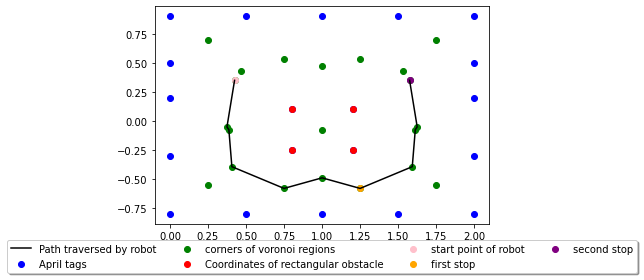

In [ ]:
# import matplotlib.pyplot as plt
# fig = plt.figure
# points_x

# plt.scatter(xx,yy)

xv = []
yv = []
for p in points:
  xv.append(p[0])
  yv.append(p[1])

xx = []
yy = []

for p in WAYPOINTS:
  xx.append(p[0])
  yy.append(p[1])

vx = []
vy = []
for p in vertices:
  vx.append(p[0])
  vy.append(p[1])

obstacles_x = [0.8,0.8, 1.2, 1.2]
obstacles_y = [-0.25, 0.1, -0.25, 0.1]

start_x = [0.43]
start_y = [0.35]

first_stop_x = [[[ 1.25 ]]]
first_stop_y = [-0.58]

second_stop_x = [[1.58]]
second_stop_y = [0.35]

plt.scatter(xv,yv,c = 'blue', label="April tags")
plt.scatter(vx,vy, c='green', label="corners of voronoi regions")
plt.plot(xx,yy, c='black', label="Path traversed by robot")
plt.scatter(obstacles_x,obstacles_y, c='red', label="Coordinates of rectangular obstacle")
plt.scatter(start_x,start_y, c='pink', label="start point of robot")
plt.scatter(first_stop_x,first_stop_y, c='orange', label="first stop")
plt.scatter(second_stop_x,second_stop_y, c='purple', label="second stop")
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05),
          fancybox=True, shadow=True, ncol=4)
plt.show()